### Problem Statement

- #### Objectives

  The primary objective of a Lending Club case study is to identify patterns which indicate if a person is likely to default on their loans.When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.For this case study we are trying to achieve our goal using Exploratory Data Analysis (EDA).

- #### Associated risks
  Two types of risks are associated with the bank’s decision-

  - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

  - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
#read the dataset and check the first five rows
loan = pd.read_csv('loan.csv',low_memory=False)
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#check shape of the datset
loan.shape

(39717, 111)

In [4]:
#Check the datatypes of all the columns of the dataframe
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


#### Data Handling and Cleaning

In [5]:
#checking null values
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

##### Clearly there are few columns which contains all the null values.We can drop those columns first.


In [6]:
# Drop those columns which contains all the null values
loan=loan.dropna(how='all',axis=1)

In [7]:
#Check the shape of the dataset now
loan.shape

(39717, 57)

#### Check the columns which still have null values.

In [8]:
for col in loan.columns:
     if loan[col].isnull().sum()>0:
         print(col)

emp_title
emp_length
desc
title
mths_since_last_delinq
mths_since_last_record
revol_util
last_pymnt_d
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
chargeoff_within_12_mths
pub_rec_bankruptcies
tax_liens


##### desc,title and purpose columns are closely related. Those give some ide why loan is taken. desc,title have some null balues.
##### As we can get the information from purpose column so dropping desc and title columns.

In [9]:
loan=loan.drop(['desc','title'],axis=1)

##### emp_tile is the job_title supplied by the borrower while applying for loan.Employer Title replaces Employer Name for all loans listed after ##### 
##### 9/23/2013. Name or Title will not serve any significant purpose for our case study.So dropping this column.

In [10]:
loan=loan.drop('emp_title',axis=1)

##### emp_length plays an imortant role for lending money.

In [11]:
loan[['emp_length']].isnull().sum()

emp_length    1075
dtype: int64

##### The null values for emp_length is not so high cmpared to our dataset size. So dropping the rows having null values

In [12]:
loan=loan[~loan['emp_length'].isnull()]

##### Inspecting emp_lenghth column

In [13]:
loan['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

##### emp_length is Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [14]:
#Converting emp_length in proper numeric values.Here we will not touch emp_length. We will introduce a new column named emp_length_in_years.
#As we are converting the values in numeric values the cloumn name will give more sense.

loan['emp_length_in_years']=loan['emp_length'].apply(lambda x:str(x).replace('< 1 year','0').replace('+ years','').replace('+','').replace('years','').replace('year',''))

#convert dtype to float
loan['emp_length_in_years']=loan['emp_length_in_years'].astype('float')

In [15]:
#now drop emp_length column
loan=loan.drop('emp_length',axis=1)

In [16]:
#check the columns still having null values
for col in loan.columns:
     if loan[col].isnull().sum()>0:
         print(col)

mths_since_last_delinq
mths_since_last_record
revol_util
last_pymnt_d
next_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
chargeoff_within_12_mths
pub_rec_bankruptcies
tax_liens


In [17]:
#Checking the count of null values still present

loan[['mths_since_last_delinq','mths_since_last_record','revol_util','last_pymnt_d','next_pymnt_d','pub_rec_bankruptcies','last_credit_pull_d','collections_12_mths_ex_med','chargeoff_within_12_mths']].isnull().sum()

mths_since_last_delinq        24952
mths_since_last_record        35979
revol_util                       47
last_pymnt_d                     66
next_pymnt_d                  37544
pub_rec_bankruptcies            697
last_credit_pull_d                2
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
dtype: int64

##### Since the missing values for mths_since_last_delinq,mths_since_last_record and next_payment_d are huge we are dropping those columns.

In [18]:
loan=loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1)

#### null values are negligible for revol_util,last_pymnt_d,pub_rec_bankruptcies,last_credit_pull_d compared to our dataset size. We can drop those rows

In [19]:
loan = loan[~loan.revol_util.isnull()]

In [20]:
loan = loan[~loan.last_pymnt_d.isnull()]

In [21]:
loan = loan[~loan.pub_rec_bankruptcies.isnull()]

In [22]:
loan = loan[~loan.last_credit_pull_d.isnull()]

In [23]:
loan = loan[~loan.collections_12_mths_ex_med.isnull()]

In [24]:
loan = loan[~loan.chargeoff_within_12_mths.isnull()]

In [25]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prnc

#### Inspecting data for Not Null values

##### For our case study where loan_status is Charged Off are mostly those type of customers who are not likely to repay the loan, i.e. he/she is likely to default, then approving the loan to them may lead to a financial loss for the company
##### So removing those rows


In [26]:
# check term column.
#Term - The number of payments on the loan. Values are in months and can be either 36 or 60.
loan['term_in_months']=loan['term'].apply(lambda x:x.replace('months',''))
loan['term_in_months']=loan['term_in_months'].astype('int32')
#drop term column
loan=loan.drop('term',axis=1)

##### dti - Lender normally prefer a dti lower than 43%. we will check the values higher than 43% and drop them.



In [27]:
loan[loan['dti']>43]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length_in_years,term_in_months


In [28]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

In [29]:
#Removing the % symbol from int_rate so we can convert it to float
loan.int_rate = loan.int_rate.apply(lambda x: x[:-1])
loan.int_rate = loan.int_rate.astype(float)
loan.int_rate.dtypes

dtype('float64')

In [30]:
#Checking why the revol_util is object data type and does it have any irrelavant characters
loan.revol_util.value_counts()

revol_util
0%        904
0.20%      59
66.60%     56
40.70%     56
61%        56
         ... 
0.83%       1
47.36%      1
24.65%      1
10.61%      1
7.28%       1
Name: count, Length: 1087, dtype: int64

In [31]:
#Converting data types of required fields to its appropriate data types
import time

loan.grade = loan.grade.astype(str)
loan.sub_grade = loan.sub_grade.astype(str)
loan.home_ownership = loan.home_ownership.astype(str)
verification_status = loan.verification_status.astype(str)
#loan.issue_d.astype(str)
#loan.issue_d.apply(lambda x: time.strftime('%b-%d', time.gmtime(x)))
loan.purpose = loan.purpose.astype(str)
loan.addr_state = loan.addr_state.astype(str)

In [32]:
#Removing the % symbol from revol_util so we can convert it to float
loan.revol_util = loan.revol_util.apply(lambda x: x[:-1])
loan.revol_util = loan.revol_util.astype(float)
loan.revol_util.dtypes

dtype('float64')

In [33]:
#Identifying univariate columns

univariate_columns = [col for col in loan.columns if loan[col].nunique() == 1]
univariate_columns

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

### Data Visualization and Conclusion

### Loan_Status

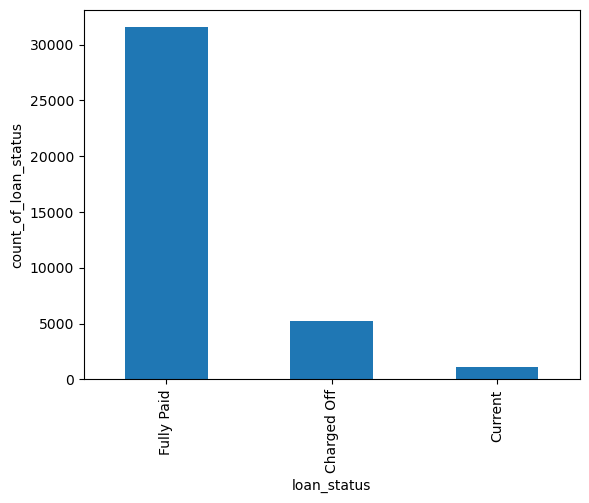

In [34]:
#Check the loan status in our dataset
loan['loan_status'].value_counts().plot.bar()
plt.ylabel('count_of_loan_status')
plt.show()

As mentioned before also applicants for whom loan_status=Charged_off have high possiblity to be defaulters.Sepecially where loan amount is in higher range and applicant status is Charged_off the risk is very high.

### Loan Amount

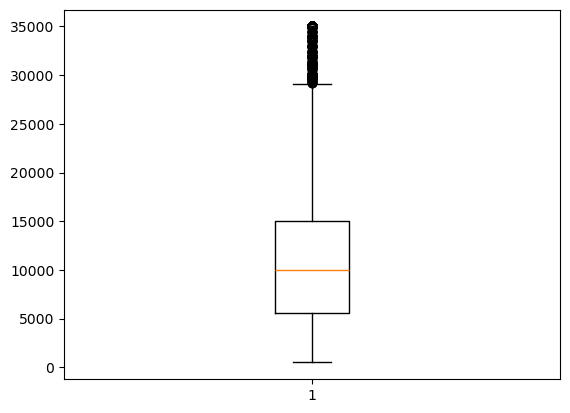

In [35]:
### outliners check for loan_amnt

plt.boxplot(loan['loan_amnt'])
plt.show()

#### Clearly there are some outliners for the loan_amnt which ranges from 30000 and 35000. Let's check those values.

In [36]:
loan_outliners= loan[(loan['loan_amnt']>=30000) & (loan['loan_amnt']<=40000)]

In [37]:
loan_outliners[['loan_amnt','loan_status', 'annual_inc','home_ownership']]

,loan_amnt,loan_status,annual_inc,home_ownership
31,31825,Fully Paid,75000.0,MORTGAGE
80,35000,Fully Paid,150000.0,MORTGAGE
128,35000,Fully Paid,125000.0,MORTGAGE
185,35000,Fully Paid,168000.0,MORTGAGE
268,35000,Fully Paid,85000.0,MORTGAGE
...,...,...,...,...
19800,32000,Fully Paid,62400.0,RENT
19811,32000,Fully Paid,93500.0,RENT
19825,30000,Fully Paid,110000.0,MORTGAGE
19838,30000,Fully Paid,360000.0,MORTGAGE


#### In this case where loan_status='Fully_Paid' we should not be worried about. Below is the bar graph to understand the relationship in this case

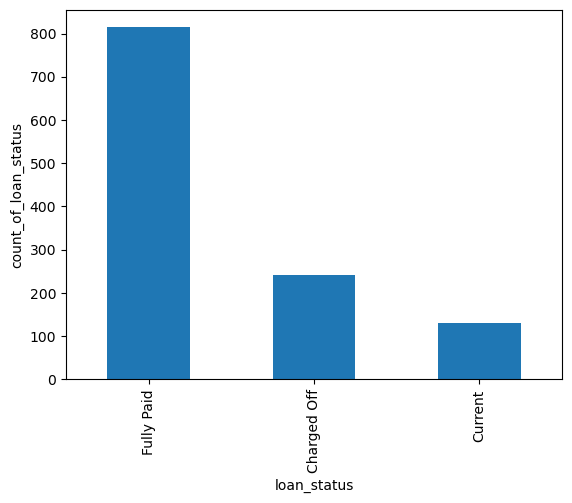

In [38]:
loan_outliners['loan_status'].value_counts().plot.bar()
plt.ylabel('count_of_loan_status')
plt.show()

So here we are seeing most of the cases where loan_amnt is between 30000 and 40000 loan_status is fully_paid. We should not worry about those 
and those customers should be considered eligible for next loan. But where loan_status='Current' and loan_amnt is between 30000 and 40000 those applicant should be considered as risky for next loan if their annual income is not in very higher range.
But at any point where loan_status is Charged_off applicants should be treated as risky.
We will check annual_income in next step.

### Funded_Amount

In [39]:
#let's check the corelation between loan_amount and funded_amount
correlation = loan['loan_amnt'].corr(loan['funded_amnt'])
correlation

0.981325264380043

We are seeing a high corelation between loan amount and funded amount. So we can say the outliner range for funded_amount and loan_amount will have similarity. And there is no much difference loan_amount and funded_amount.

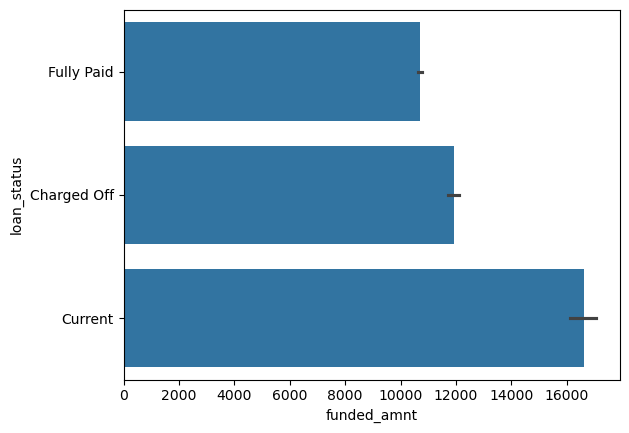

In [40]:
sns.barplot(data=loan, x='funded_amnt',y='loan_status') 
plt.show()

Comparing the loan amount and loan status tells that large amount does have higher risk of getting not paid but impact is not very huge.

#### Annual Income

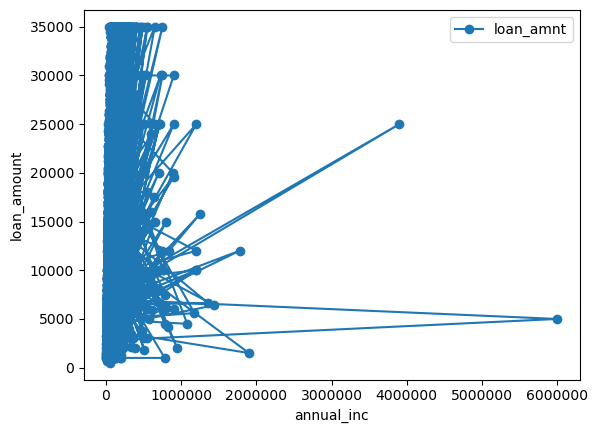

In [41]:
loan.plot(kind='line', x='annual_inc', y='loan_amnt', marker='o')
plt.ylabel('loan_amount')
plt.ticklabel_format(style='plain')
plt.show()

From the above represntation we can say some cases where annual income is low the loan_amnt is in higher range. In this case if previous loan_status is not Fully paid then approving other loan may be risky.Let's check that fact where annual_income is less than 2000000 and loan_amnt is more than 25000 and current loan_status is not fully_paid.

In [42]:
loan[(loan['annual_inc']<=2000000) & (loan['loan_amnt']>=25000) & ((loan['loan_status']=='Current')| (loan['loan_status']=='Charged off'))]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,home_ownership,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length_in_years,term_in_months
326,1065142,1299224,25000,25000,24975.00000,19.03,648.93,E,E2,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
417,1064386,1298184,25975,16475,15252.50679,12.69,372.25,B,B5,MORTGAGE,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
431,1057239,1288798,35000,35000,32763.05520,19.42,916.03,E,E3,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,8.0,60
488,1063653,1296216,25000,25000,24975.00000,19.42,654.31,E,E3,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
492,1063626,1296185,25000,19950,19925.00000,14.27,467.00,C,C2,MORTGAGE,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14785,760328,934559,25000,25000,24750.00000,14.91,593.57,D,D2,MORTGAGE,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
14936,757106,957117,25975,16775,16500.00000,13.49,385.91,C,C2,MORTGAGE,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
14984,755335,955139,35000,23650,23625.00000,19.69,622.51,E,E5,MORTGAGE,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60
15114,754163,953869,35000,22125,22075.00000,19.29,577.48,E,E4,RENT,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,10.0,60


So we can conclude the above set of applicants should be considered as risky. Mostly they are defaulters.

#### Verification Status

For approving loan verification status of annual income plays an important role. 

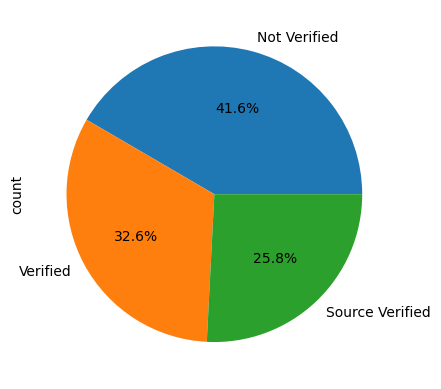

In [43]:
loan['verification_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In the given data mostly we are seeing income source is not verified which should not be the case as a lender perspective.Will check defaulters against verification_status.

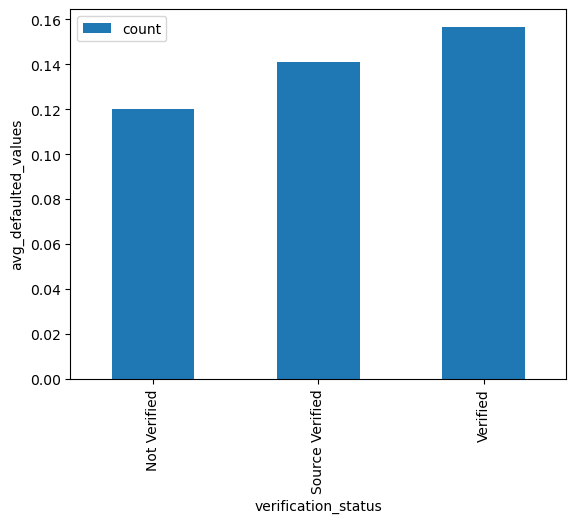

In [44]:
loan_charged_off=loan[loan['loan_status']=='Charged Off']

#get the avg value of defaulters in each section
defaulted_applicant_verification_status=loan_charged_off['verification_status'].value_counts()/loan['verification_status'].value_counts()
#plot a barchart
pd.DataFrame(defaulted_applicant_verification_status).plot.bar()
plt.ylabel('avg_defaulted_values')
plt.show()

It is surprsing to see that number of defaulters are maximum for applicants where income_source is verified compared to non verified customers.

#### Purpose of the Loan

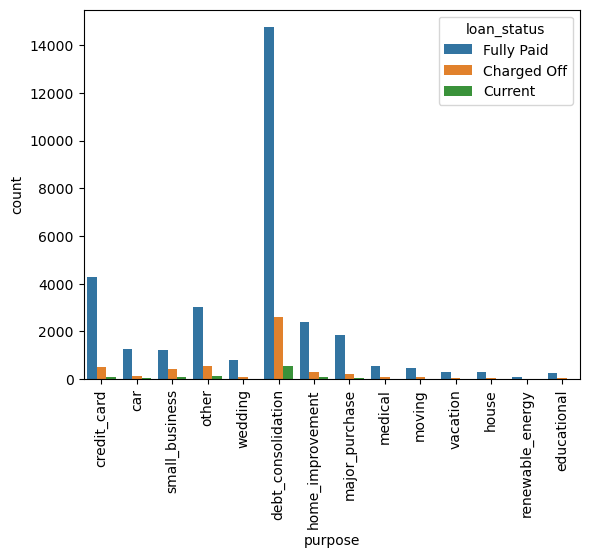

In [45]:
#plot a countplot
sns.countplot(data=loan,x='purpose',hue='loan_status')
plt.xticks(rotation=90)
plt.show()

From the above represntation we can say most people applied for debt_consolidation followed by credit card. On the other hand number of applicants for house,vacation.education and renewable_energy are very less.So if any applicant is applying for house,vacation.education and renewable_energy loan those set of applicnats should be verified properly or should be given loan for higher interest rate.

Now let's check loan_status against the purpose of the loan. It will give a fair idea in which section defaulters number is more.

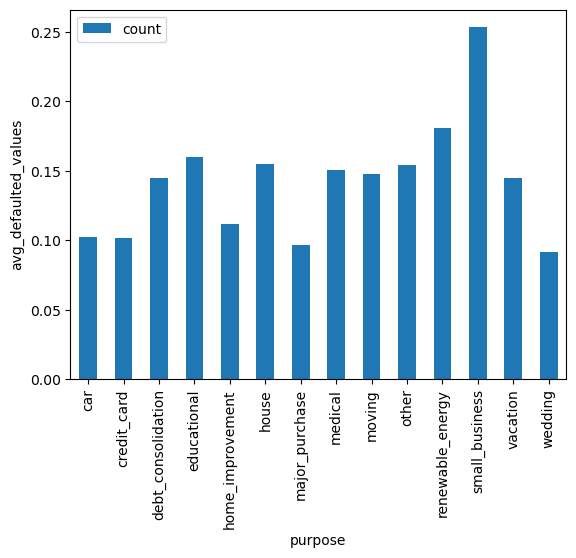

In [46]:
#filter the applicants where loan_status=Charged_Off

loan_charged_off=loan[loan['loan_status']=='Charged Off']

#get the avg value of defaulters in each section
defaulted_applicant_purpose=loan_charged_off['purpose'].value_counts()/loan['purpose'].value_counts()

#plot a barchart
pd.DataFrame(defaulted_applicant_purpose).plot.bar()
plt.ylabel('avg_defaulted_values')
plt.show()

So from the above plot we can say in small_business section percentage of defaulters are maximum followed by renewable_energy. So for giving loan is these section will be risky in future.

#### Home Ownership

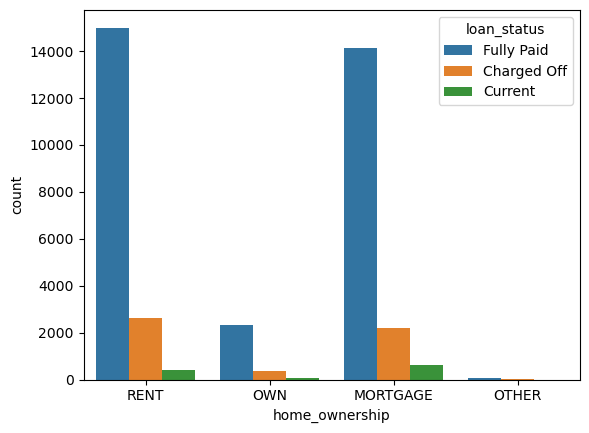

In [47]:
sns.countplot(data=loan,x='home_ownership',hue='loan_status')
plt.show()

People who are living in rent are mostly applying for loan followed by the people for whom home_ownership is mortgage. As we saw before most people applied loan for debt_consolidation which makes sense. On the other hand number of peopler applying loan and having own or other as home_ownership is very less. Let's check the pattern of defaulters based on home_ownership.

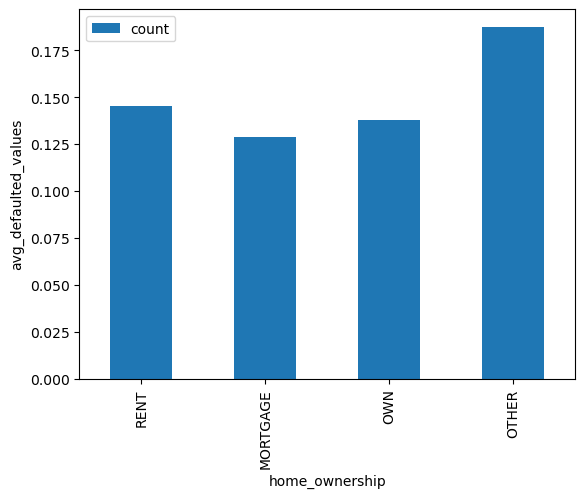

In [48]:
#filter the applicants where loan_status=Charged_Off

loan_charged_off=loan[loan['loan_status']=='Charged Off']

#get the avg value of defaulters in each section
defaulted_applicant_home_ownership=loan_charged_off['home_ownership'].value_counts()/loan['home_ownership'].value_counts()

#plot a barchart
pd.DataFrame(defaulted_applicant_home_ownership).plot.bar()
plt.ylabel('avg_defaulted_values')
plt.show()

In case of home_ownership is Other there is chance of getting high percentage of defaulters followed by rent and own. In case mortgage the value is lowest.

### REVOL_UTIL

In [49]:
loan.revol_util.value_counts().sort_index()

revol_util
0.00     904
0.01       1
0.03       1
0.04       1
0.05       1
        ... 
99.50     24
99.60     22
99.70     30
99.80     23
99.90     25
Name: count, Length: 1087, dtype: int64

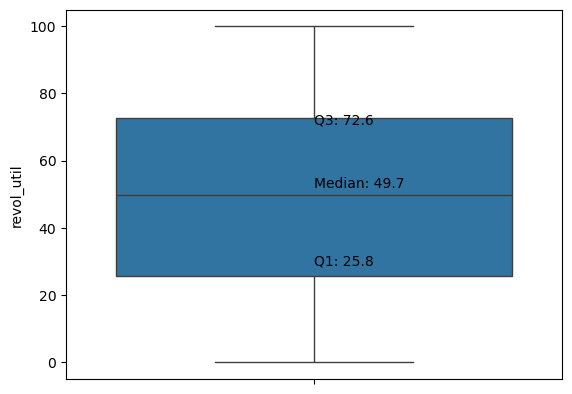

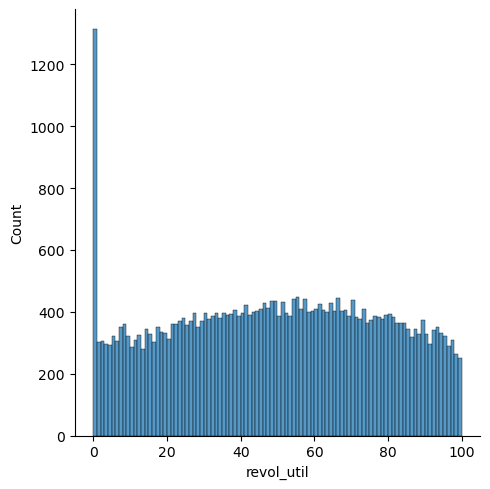

In [50]:
#As we already converted revol_util to proper type, we can work on it
import seaborn as sns
sns.boxplot(data=loan.revol_util)
plt.text(0,52, 'Median: '+str(loan.revol_util.median()))
plt.text(0,29, 'Q1: '+str(np.percentile(loan.revol_util, 25)))
plt.text(0,71, 'Q3: '+str(np.percentile(loan.revol_util, 75)))

#Box plot shows that we don't have any outliers and the 50th percentile is around 50%, 25th percentile around 25% and 75th percentile is around 75% and IQR is 25% to 75%

sns.displot(loan.revol_util, bins=100)
plt.show()
#From the histogram we see that the maximum number of people have 0 revol_util and is a good and the rest data is quite uniformly distributed, which does not tell us much

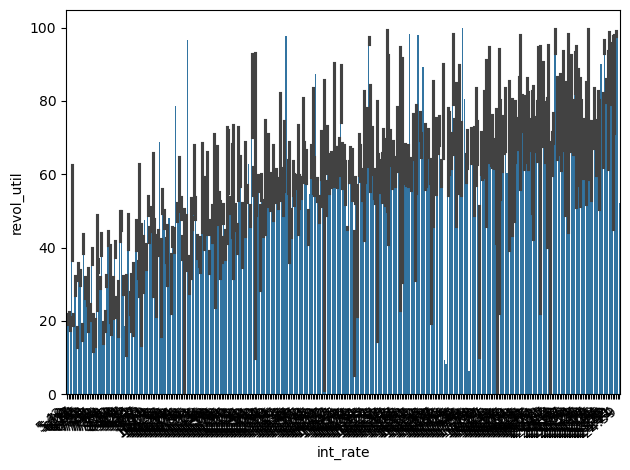

<Figure size 2500x1000 with 0 Axes>

In [51]:
#Let's check revol_util against against other variables
#plt.figure(figsize=(200,15))

ax = sns.barplot(data=loan,x='int_rate',y='revol_util')  
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.tight_layout()
plt.figure(figsize=(25,10))

#plt.xticks(rotation=90)
plt.show()

There is a clear pattern between revol_util and int_rate, with increase in amount of credit the borrower is using the interest rate increases, which means risk is higer for people who are closer to their credit limit

<Axes: xlabel='revol_util', ylabel='loan_status'>

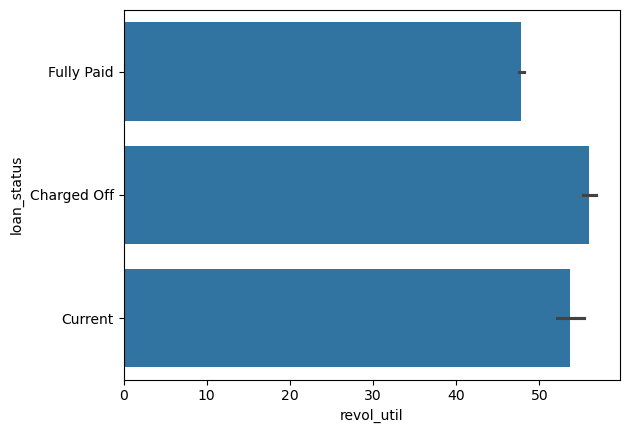

In [52]:
#Comparing revol_util with loan_status
sns.barplot(data=loan,y='loan_status',x='revol_util')    

loan_status Vs revol_util shows that borrower who have used their credit limit more are more likely to have Charged off status that means they are more likely to default.

### Employment_Length

Employed individuals generally pose lower risk than unemployed or underemployed applicants. Let's see what does the data have to say about that

<Axes: xlabel='emp_length_in_years', ylabel='loan_status'>

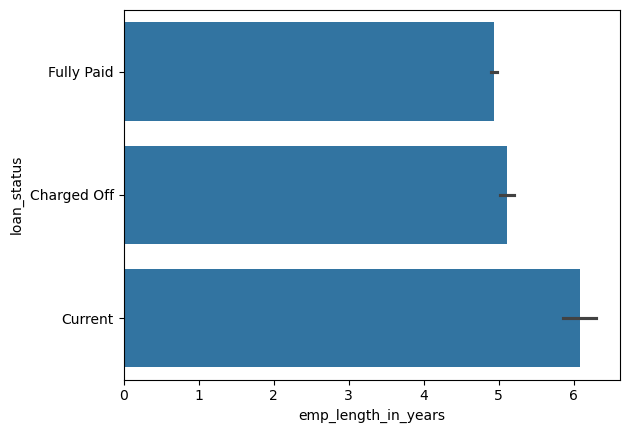

In [53]:
sns.barplot(data=loan, x='emp_length_in_years', y='loan_status') 

#Employment length doesn't really have a huge impact on repayment of loan

From the above representation we can say Employment length doesn't really have a huge impact on repayment of loan.

### dti

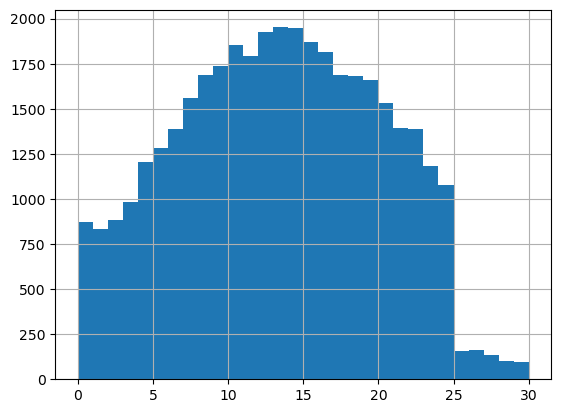

In [54]:
loan['dti'].hist(bins=30)
plt.show()

From the above plot we can say for most of the applicants dti is in between 10 to 20. And maximum dti is below 30. Normally for lending money dti should be less than 43. So considering only dti we cannot say this set of applicants are risky or not.Will try to check this value agains loan_status.

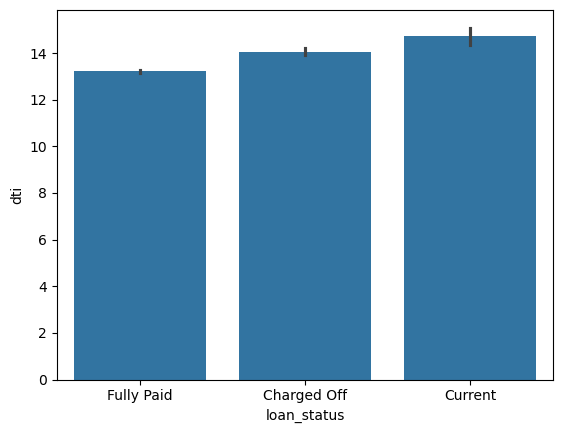

In [55]:
sns.barplot(data=loan,x=loan['loan_status'],y=loan['dti'])
plt.show()

The value doesnot differ much if we compare dti with loan_status. So in this dataset dti is not playing very important factor to find the defaulters.

### DELININQ_2_YEARS

The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

In [56]:
loan.delinq_2yrs.value_counts()

delinq_2yrs
0     33734
1      3151
2       647
3       205
4        57
5        21
6        10
7         4
8         2
9         1
11        1
Name: count, dtype: int64

<Axes: xlabel='delinq_2yrs', ylabel='count'>

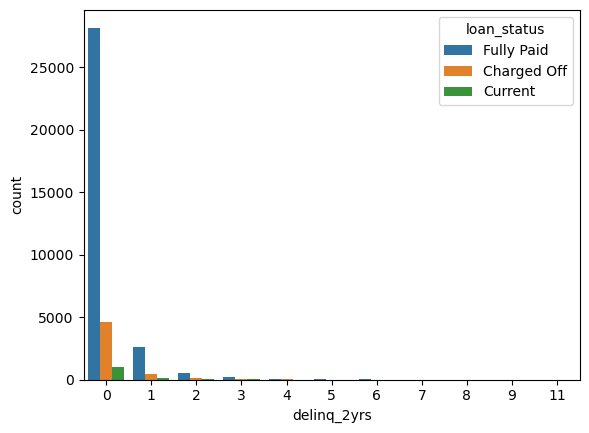

In [57]:
sns.countplot(data=loan, hue='loan_status', x='delinq_2yrs')

delinq_2yr value is consistently resucing in the dataset which is a good.But from the above reprentation we can say when delinq_2yr may have an impact on finding defaulters. Let's find the avg value and try to see the result.

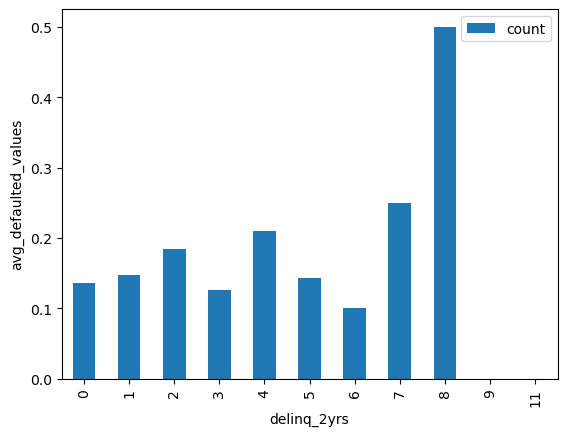

In [58]:
#filter the applicants where loan_status=Charged_Off

loan_charged_off=loan[loan['loan_status']=='Charged Off']

#get the avg value of defaulters in each section
defaulted_applicant_delinq_2yr=loan_charged_off['delinq_2yrs'].value_counts()/loan['delinq_2yrs'].value_counts()
#plot a barchart
pd.DataFrame(defaulted_applicant_delinq_2yr).plot.bar()
plt.ylabel('avg_defaulted_values')
plt.show()

When delinq_2yrs is 8 the defaulters value is 50 percent. From the above represntation we cannot predict a specific pattern to find the defauters considering delinq_2yrs as the pattern in not consistent.

### Grade

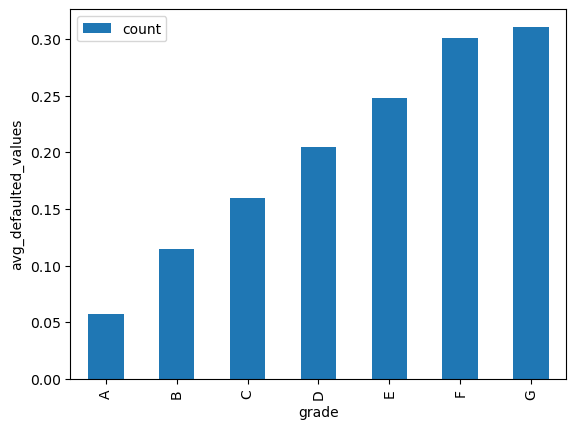

In [59]:
#filter the applicants where loan_status=Charged_Off

loan_charged_off=loan[loan['loan_status']=='Charged Off']

#get the avg value of defaulters in each section
defaulted_applicant_grader=loan_charged_off['grade'].value_counts()/loan['grade'].value_counts()
#plot a barchart
pd.DataFrame(defaulted_applicant_grader).plot.bar()
plt.ylabel('avg_defaulted_values')
plt.show()

It is a consistent pattern. The chance of finding defaulters is highest for grade G and lowest in grade A.Company should consider D,E,F and G grade as risky and implement proper risk asessment for those grades.